Dimensiones: (506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2



--- Datos Nulos ---
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

--- Tipos de datos ---
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
MEDV       float64
dtype: object

--- Correlación con MEDV ---


,MEDV
MEDV,1.000000
rm,0.695360
zn,0.360445
b,0.333461
dis,0.249929
chas,0.175260
age,-0.376955
rad,-0.381626
crim,-0.388305
nox,-0.427321



Tamaños -> Train: 303 Val: 101 Test: 102

Mejor Ridge α: {'alpha': np.float64(12.742749857031322)}
Mejor Lasso α: {'alpha': np.float64(0.001)}
Mejor ElasticNet: {'alpha': np.float64(0.018329807108324356), 'l1_ratio': 0.2}

--- MÉTRICAS EN TEST ---
Ridge      -> R2=0.6487  RMSE=5.0759
Lasso      -> R2=0.6498  RMSE=5.0674
ElasticNet -> R2=0.6490  RMSE=5.0731


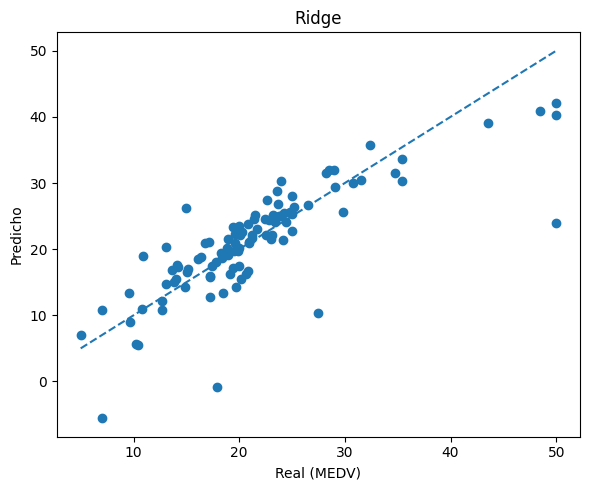

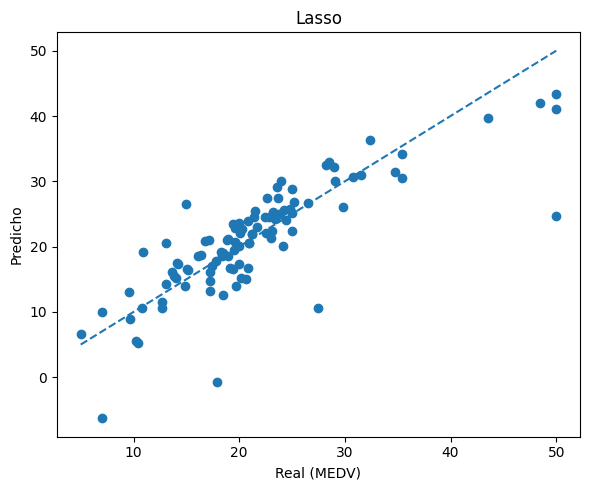

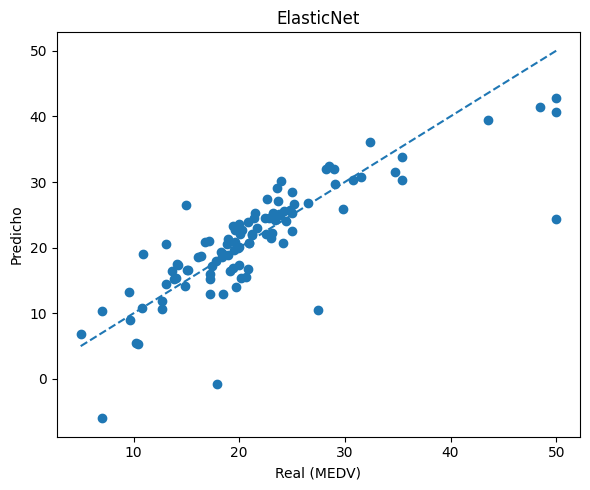


Primeras filas de la comparación:


,MEDV_real,Ridge,Lasso,ElasticNet
0,23.6,28.823173,29.184036,29.039372
1,32.4,35.689340,36.378630,36.070654
2,13.6,16.809656,16.058556,16.474833
3,22.8,24.352686,24.504592,24.446759
4,16.1,18.537469,18.527613,18.523914
5,20.0,23.562933,23.657895,23.629142
6,17.8,18.101794,17.813379,17.928773
7,14.0,15.509567,15.243561,15.370412
8,19.6,22.316182,22.916579,22.633342
9,16.8,20.962515,20.796180,20.891269


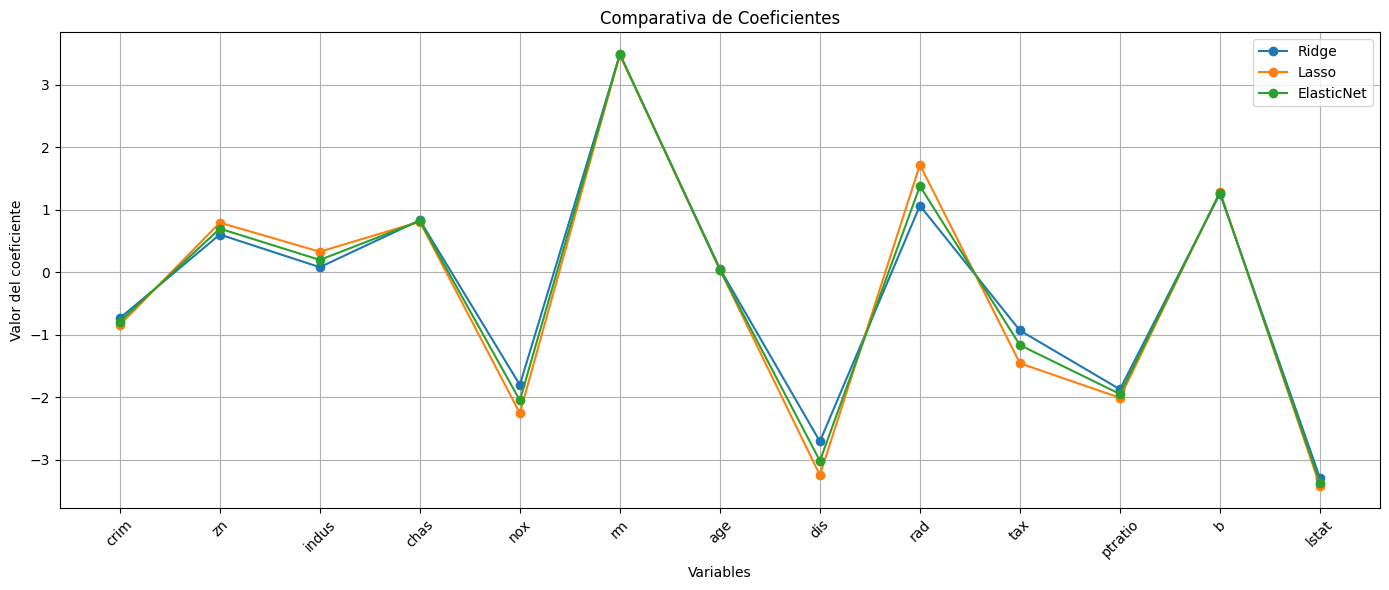


Variables ELIMINADAS por Lasso (coef = 0):
[]

Variables conservadas por Lasso (coef != 0):
['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']


In [2]:
# ACTIVIDAD - RIDGE / LASSO / ELASTICNET

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

plt.rcParams['figure.figsize'] = (9,6)

# =======================================================
# 1. CARGA DEL DATASET
# =======================================================

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# renombramos para ser consistentes
df.rename(columns={"medv": "MEDV"}, inplace=True)

print("Dimensiones:", df.shape)
display(df.head())

# =======================================================
# 2. ANÁLISIS RÁPIDO
# =======================================================

print("\n--- Datos Nulos ---")
print(df.isnull().sum())

print("\n--- Tipos de datos ---")
print(df.dtypes)

print("\n--- Correlación con MEDV ---")
display(df.corr()["MEDV"].sort_values(ascending=False))

# =======================================================
# 3. SPLIT + NORMALIZACIÓN
# =======================================================

X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# split train / test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# otra división para validación si la necesitamos
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42
)

# normalización (StandardScaler recomendado para regresión penalizada)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_train_full_s = scaler.fit_transform(X_train_full)
X_test_s = scaler.transform(X_test)

print("\nTamaños -> Train:", len(X_train), "Val:", len(X_val), "Test:", len(X_test))

# =======================================================
# 4. GRID SEARCH PARA RIDGE / LASSO / ELASTICNET
# =======================================================

param_grid = {"alpha": np.logspace(-3, 3, 20)}  # alphas entre 0.001 y 1000

# RIDGE
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring="r2")
grid_ridge.fit(X_train_s, y_train)

# LASSO
lasso = Lasso(max_iter=5000)
grid_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring="r2")
grid_lasso.fit(X_train_s, y_train)

# ELASTICNET
elastic = ElasticNet(max_iter=5000)
param_grid_elastic = {
    "alpha": np.logspace(-3, 3, 20),
    "l1_ratio": [0.2, 0.5, 0.7, 0.9]
}
grid_elastic = GridSearchCV(elastic, param_grid_elastic, cv=5, scoring="r2")
grid_elastic.fit(X_train_s, y_train)

# =======================================================
# 5. MEJORES MODELOS
# =======================================================

print("\nMejor Ridge α:", grid_ridge.best_params_)
print("Mejor Lasso α:", grid_lasso.best_params_)
print("Mejor ElasticNet:", grid_elastic.best_params_)

ridge_best = grid_ridge.best_estimator_
lasso_best = grid_lasso.best_estimator_
elastic_best = grid_elastic.best_estimator_

# =======================================================
# 6. EVALUACIÓN EN TEST
# =======================================================

def evaluar(modelo, Xs, y):
    pred = modelo.predict(Xs)
    return r2_score(y, pred), np.sqrt(mean_squared_error(y, pred)), pred

r2_ridge, rmse_ridge, pred_ridge = evaluar(ridge_best, X_test_s, y_test)
r2_lasso, rmse_lasso, pred_lasso = evaluar(lasso_best, X_test_s, y_test)
r2_elastic, rmse_elastic, pred_elastic = evaluar(elastic_best, X_test_s, y_test)

print("\n--- MÉTRICAS EN TEST ---")
print(f"Ridge      -> R2={r2_ridge:.4f}  RMSE={rmse_ridge:.4f}")
print(f"Lasso      -> R2={r2_lasso:.4f}  RMSE={rmse_lasso:.4f}")
print(f"ElasticNet -> R2={r2_elastic:.4f}  RMSE={rmse_elastic:.4f}")

# =======================================================
# 7. GRÁFICAS REAL VS PREDICHO
# (3 gráficas separadas)
# =======================================================

def plot_real_pred(y_real, y_pred, titulo):
    plt.figure(figsize=(6,5))
    plt.scatter(y_real, y_pred)
    minv, maxv = y_real.min(), y_real.max()
    plt.plot([minv, maxv], [minv, maxv], '--')
    plt.title(titulo)
    plt.xlabel("Real (MEDV)")
    plt.ylabel("Predicho")
    plt.tight_layout()
    plt.show()

plot_real_pred(y_test, pred_ridge, "Ridge")
plot_real_pred(y_test, pred_lasso, "Lasso")
plot_real_pred(y_test, pred_elastic, "ElasticNet")

# =======================================================
# 8. TABLA COMPARATIVA
# =======================================================

tabla = pd.DataFrame({
    "MEDV_real": y_test.values,
    "Ridge": pred_ridge,
    "Lasso": pred_lasso,
    "ElasticNet": pred_elastic
})

print("\nPrimeras filas de la comparación:")
display(tabla.head(12))

# =======================================================
# 9. GRÁFICO COMPARATIVO DE COEFICIENTES
# =======================================================

coef_ridge = ridge_best.coef_
coef_lasso = lasso_best.coef_
coef_elastic = elastic_best.coef_

variables = X.columns

plt.figure(figsize=(14,6))
x = np.arange(len(variables))

plt.plot(x, coef_ridge, marker='o', label="Ridge")
plt.plot(x, coef_lasso, marker='o', label="Lasso")
plt.plot(x, coef_elastic, marker='o', label="ElasticNet")

plt.xticks(x, variables, rotation=45)
plt.title("Comparativa de Coeficientes")
plt.xlabel("Variables")
plt.ylabel("Valor del coeficiente")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# =======================================================
# 10. VARIABLES ELIMINADAS POR LASSO
# =======================================================

variables_eliminadas = [var for var, coef in zip(variables, coef_lasso) if coef == 0]
variables_mantenidas = [var for var, coef in zip(variables, coef_lasso) if coef != 0]

print("\nVariables ELIMINADAS por Lasso (coef = 0):")
print(variables_eliminadas)

print("\nVariables conservadas por Lasso (coef != 0):")
print(variables_mantenidas)

